# Importing dependencies

In [91]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from matplotlib import cm

# Loading data

In [178]:
df = pd.read_csv('data.csv')

In [181]:
df.iloc[0].to_dict()

{'V1': 58,
 'V2': 'management',
 'V3': 'married',
 'V4': 'tertiary',
 'V5': 'no',
 'V6': 2143,
 'V7': 'yes',
 'V8': 'no',
 'V9': 'unknown',
 'V10': 5,
 'V11': 'may',
 'V12': 261,
 'V13': 1,
 'V14': -1,
 'V15': 0,
 'V16': 'unknown',
 'Class': 1}

# Exploring the dataset

Source: [UCI](https://archive.ics.uci.edu/ml/datasets/bank+marketing)
Please cite: S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

Bank Marketing
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Attribute information
For more information, read [Moro et al., 2011].

Input variables:

- bank client data:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur", "student","blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

- related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

- other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

- output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Let's fix the feature names first.

In [93]:
df.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campain', 'passed_days', 'previous', 'poutcome', 'success']

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day          45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campain      45211 non-null  int64 
 13  passed_days  45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     45211 non-null  object
 16  success      45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [95]:
df['success'].value_counts()/len(df)

1    0.883015
2    0.116985
Name: success, dtype: float64

We are dealing with an imbalanced data. Let's fix the categories first.

In [96]:
df['success'] = df['success'].map({1:'no' ,2:'yes' })

In [97]:
cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month',
       'poutcome']

In [98]:
for col in cat:
    print("\n")
    print(f"value counts for {col} are:")
    print(df[col].value_counts())



value counts for job are:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


value counts for marital are:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


value counts for education are:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


value counts for default are:
no     44396
yes      815
Name: default, dtype: int64


value counts for housing are:
yes    25130
no     20081
Name: housing, dtype: int64


value counts for loan are:
no     37967
yes     7244
Name: loan, dtype: int64


value counts for contact are:
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


value counts for day are:
20    2752
18    2308
21    2026


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day          45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campain      45211 non-null  int64 
 13  passed_days  45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     45211 non-null  object
 16  success      45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Train test split

In [100]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [101]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [102]:
df.shape, df_train.shape, df_val.shape, df_test.shape

((45211, 17), (27126, 17), (9042, 17), (9043, 17))

In [103]:
df = df_train

# Distribution of labels

In [104]:
df['success'].value_counts(normalize = True)

no     0.884686
yes    0.115314
Name: success, dtype: float64

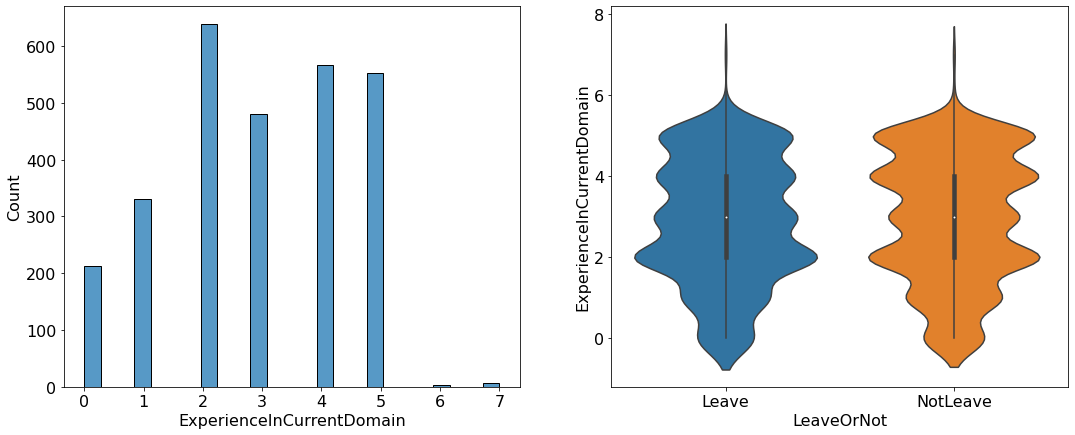

In [ ]:
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)

sns.histplot(x = 'ExperienceInCurrentDomain', data = df)

plt.subplot(1,2,2)
sns.violinplot(x=df['LeaveOrNot'], y=df['ExperienceInCurrentDomain'])

plt.show()

### Unbalancing is an issue.

# EDA of the features

## 1. Age

`Age` is a numerical variable. the best way to study it is to use distributions and boxplots/violinplots.

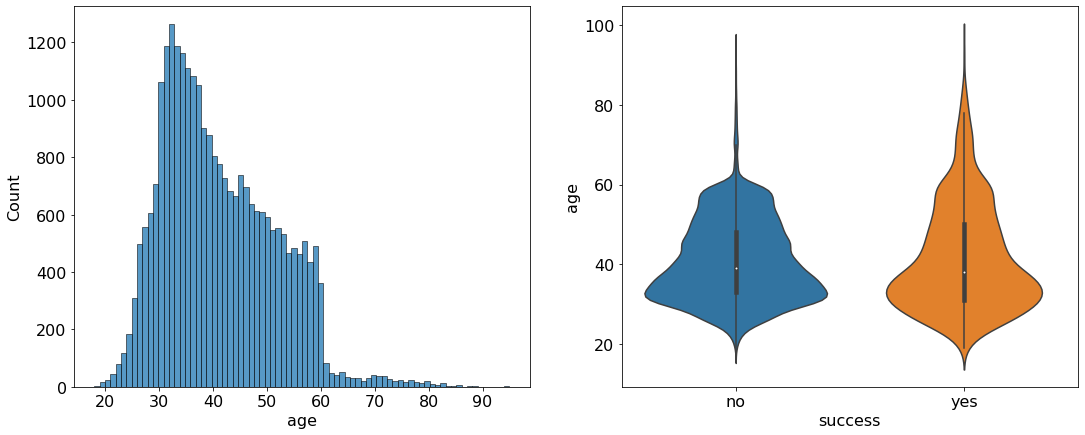

In [31]:
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)

sns.histplot(x = 'age', data = df)

plt.subplot(1,2,2)
sns.violinplot(x=df['success'], y=df['age'])

plt.show()

There is an association between age and success of the campain as the distrubution of age for the two labels are different.

## 2. job

In [27]:
plt.rcParams['font.size'] = '16'

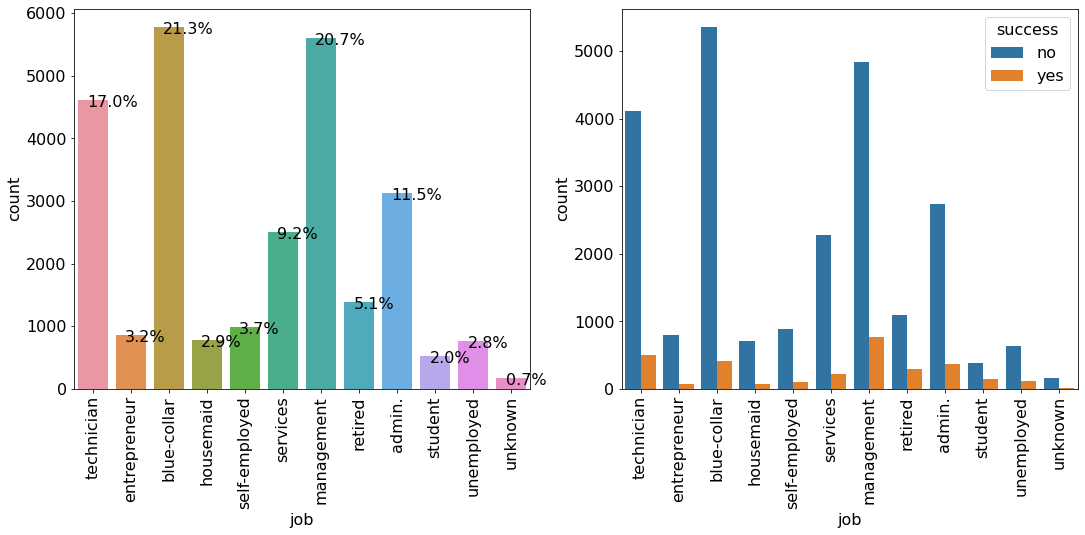

In [30]:
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)

ax = sns.countplot(x = 'job', data = df)
plt.xticks(rotation=90)
total = len(df['job'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        y = p.get_y() + p.get_height() - 110
        x = p.get_x() + p.get_width()/2 - 0.15
        ax.annotate(percentage, (x, y))

plt.subplot(1,2,2)
sns.countplot(x = df['job'], hue = df['success'])
plt.xticks(rotation=90)

plt.show()


There is an association between the job and success of the campain. for example, a person with management type job has a higher chance of success.

## 3. Marital statue

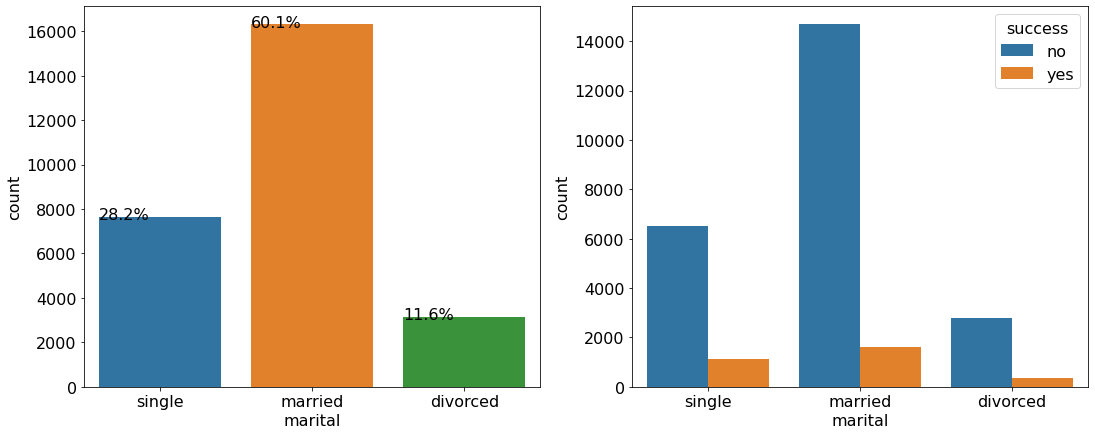

In [32]:
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)

ax = sns.countplot(x = 'marital', data = df)
total = len(df['marital'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        y = p.get_y() + p.get_height() - 110
        x = p.get_x() + p.get_width()/2 - 0.4
        ax.annotate(percentage, (x, y))

plt.subplot(1,2,2)
sns.countplot(x = df['marital'], hue = df['success'])

plt.show()

There is an association between the marital statue and the succcess of the campain.

## 4. Education

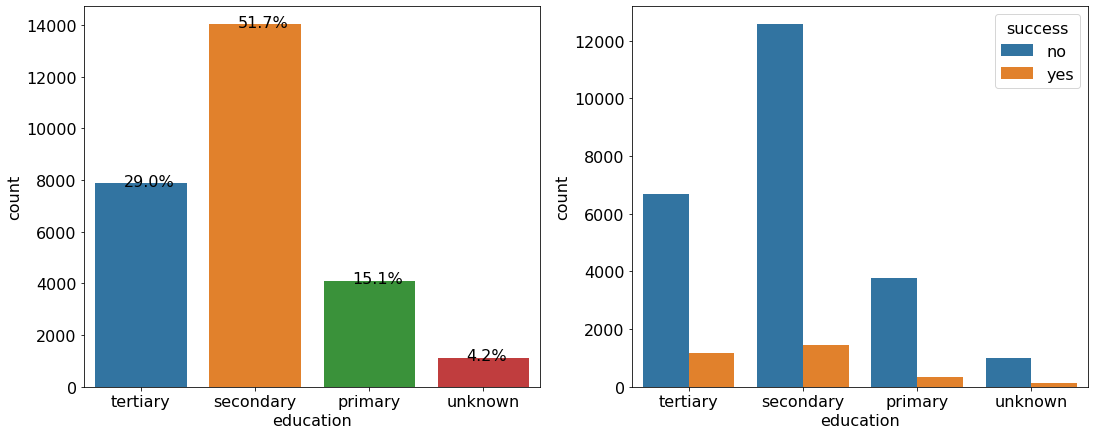

In [34]:
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)

ax = sns.countplot(x = 'education', data = df)
total = len(df['education'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        y = p.get_y() + p.get_height() - 110
        x = p.get_x() + p.get_width()/2 - 0.15
        ax.annotate(percentage, (x, y))

plt.subplot(1,2,2)
sns.countplot(x = df['education'], hue = df['success'])

plt.show()

There is an association between educaiton and the success of the campain.

## 5. default

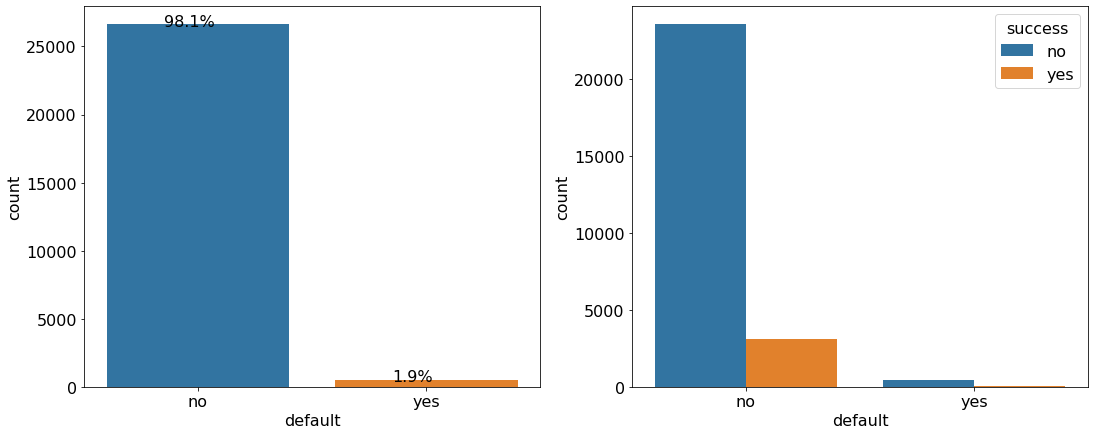

In [35]:
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)

ax = sns.countplot(x = 'default', data = df)
total = len(df['default'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        y = p.get_y() + p.get_height() - 110
        x = p.get_x() + p.get_width()/2 - 0.15
        ax.annotate(percentage, (x, y))

plt.subplot(1,2,2)
sns.countplot(x = df['default'], hue = df['success'])

plt.show()

## 6. balance

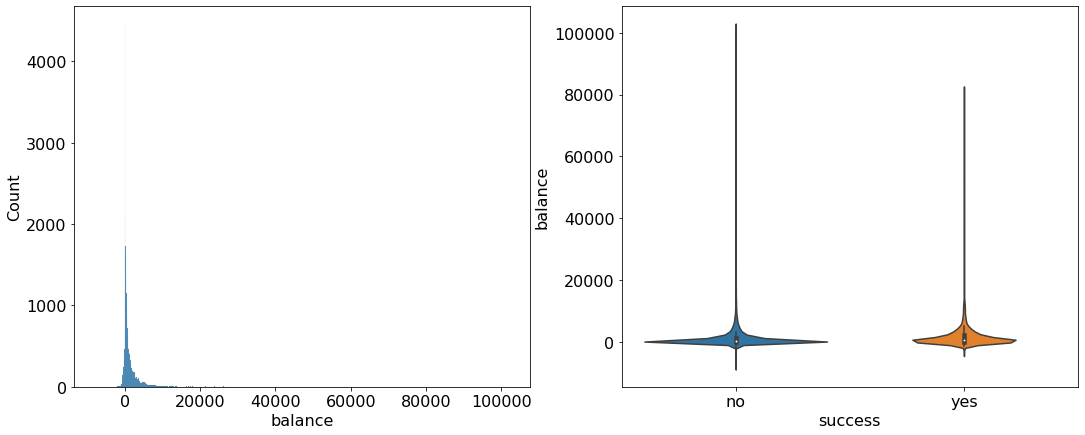

In [36]:
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)

sns.histplot(x = 'balance', data = df)

plt.subplot(1,2,2)
sns.violinplot(x=df['success'], y=df['balance'])

plt.show()

## 7. housing

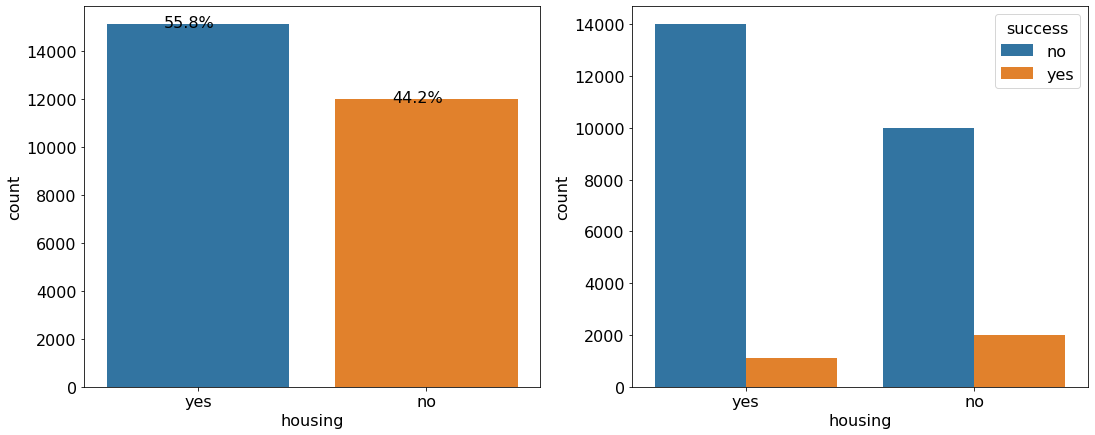

In [37]:
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)

ax = sns.countplot(x = 'housing', data = df)
total = len(df['housing'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        y = p.get_y() + p.get_height() - 110
        x = p.get_x() + p.get_width()/2 - 0.15
        ax.annotate(percentage, (x, y))

plt.subplot(1,2,2)
sns.countplot(x = df['housing'], hue = df['success'])

plt.show()

There is a clear association between haveing a housing loan and the success of the campain.

# Training the Model

In [105]:
df_train.success = (df_train.success == 'yes').astype(int)

In [106]:
df_val.success = (df_val.success == 'yes').astype(int)
df_test.success = (df_test.success == 'yes').astype(int)

In [107]:
y_train = df_train['success'].values
y_test = df_test['success'].values
y_val = df_val['success'].values

In [108]:
del df_train['success']
del df_test['success']
del df_val['success']

In [109]:
from sklearn.feature_extraction import DictVectorizer

In [110]:
numerical = list(df._get_numeric_data().columns)
categorical = [x for x in list(df.columns) if x not in numerical]

In [111]:
dv = DictVectorizer(sparse = False)

In [112]:
train_dict = df_train[categorical+numerical].to_dict(orient = 'record')
X_train = dv.fit_transform(train_dict)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:1549: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(


In [113]:
val_dict = df_val[categorical+numerical].to_dict(orient = 'record')
test_dict = df_test[categorical+numerical].to_dict(orient = 'record')
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

# Models

## 1. Decision Tree

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [115]:
dt = DecisionTreeClassifier()

In [116]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [117]:
from sklearn.metrics import roc_auc_score

In [118]:
y_pred = dt.predict_proba(X_val)[:, 1]
print("ROC-AUC for validation set is:" , roc_auc_score(y_val, y_pred))
y_pred = dt.predict_proba(X_train)[:, 1]
print("ROC-AUC for training set is:" , roc_auc_score(y_train, y_pred))

ROC-AUC for validation set is: 0.7093826054743002
ROC-AUC for training set is: 1.0


It is natural that decision tree overfits the training dataset. In the following we will fine tune the decision tree model parameters.

### 1.1. Decision tree parameter tuning

In [119]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.673
   2 -> 0.746
   3 -> 0.762
   4 -> 0.833
   5 -> 0.859
   6 -> 0.866
  10 -> 0.851
  15 -> 0.753
  20 -> 0.672
None -> 0.713


In [120]:
scores = []

for depth in [4, 5, 6, 7, 8]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [121]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [122]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                            
max_depth             4      5      6      7      8
min_samples_leaf                                   
1                 0.833  0.859  0.866  0.871  0.872
5                 0.833  0.859  0.870  0.875  0.878
10                0.833  0.859  0.869  0.876  0.883
15                0.833  0.859  0.871  0.879  0.890
20                0.833  0.859  0.871  0.882  0.898
100               0.832  0.859  0.874  0.885  0.894
200               0.831  0.855  0.870  0.884  0.892
500               0.849  0.875  0.884  0.887  0.888

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

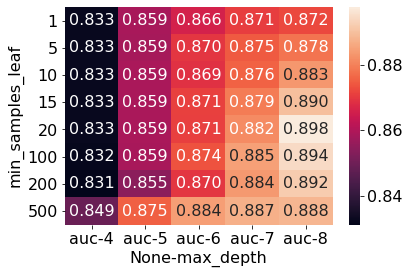

In [123]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

Best tree based on the search: max_depth=8, min_samples_leaf=20

In [124]:
dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=20)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8974825440443421

## *Parameter tunning via randomized search and cross validation:*

In [125]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [126]:
param_dist = {
    'max_depth': randint(low = 1, high = 10), 
    'min_samples_leaf': randint(low = 1, high = 20)
}

dt = DecisionTreeClassifier(random_state=1)
rnd_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter = 200, cv = 6, scoring='roc_auc', random_state=40)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=6, estimator=DecisionTreeClassifier(random_state=1),
                   n_iter=200,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024B43C43640>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024B440A38B0>},
                   random_state=40, scoring='roc_auc')

In [127]:
rnd_search.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=19, random_state=1)

Training the model with the tuned parameter based on a random search:

In [128]:
dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=19)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8993834143802375

## 2. Ensembles and random forest

## *Manual Parameter Tunning:*

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [131]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

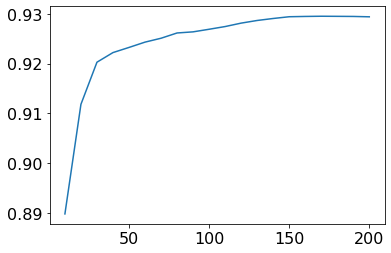

In [132]:
plt.plot(df_scores.n_estimators, df_scores.auc)

Let's do a grid search consideing max_depth and number of estimators as parameters:

In [133]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [134]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

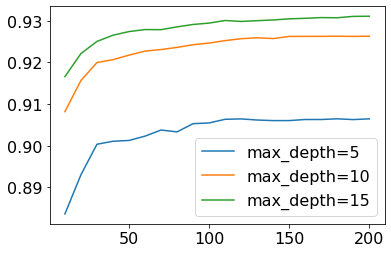

In [135]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

max_depth = 15 is showing the best performance. Let's continue the search by fixing the maximum depth and searching for optimum min_sample_leaf:

In [136]:
max_depth = 15

In [137]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [138]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

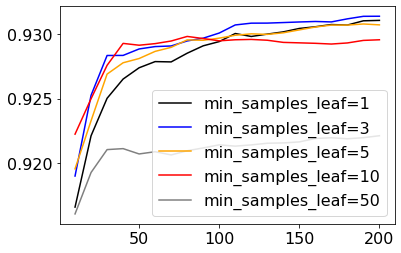

In [139]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [140]:
min_samples_leaf = 3

In [141]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)


0.9313867226882876

Now let's train the two models on the full train dataset and calculate the AUC score for the test dataset:

In [173]:
y_train_full = (df_train_full.success == 'yes').astype(int).values

In [174]:
del df_train_full['success']

In [175]:
dicts_train_full = df_train_full.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_train_full)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [176]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=19)
dt.fit(X_full_train, y_train_full)
y_pred = dt.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.8740393783415433

In [177]:
# Random Forrest
rf = RandomForestClassifier(max_depth=15, min_samples_leaf=3 , n_estimators=200,
                       random_state=42)
rf.fit(X_full_train, y_train_full)
y_pred = rf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.92782577684254

We are going to use the random forrest model.